<a href="https://colab.research.google.com/github/Aizhanbaibolot/DA-Portfolio/blob/Aizhanbaibolot-capstone-3/capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The data is called The Best Cities and Countries for Startups.
The dataset consists of 1000 records across 9 fields.
I would like to answer two questions using the data. The first is to see if there is any correlation between quantity score and quality score of the countries. The second is to see if there is a significant difference between total scores for cities with sign of change in position and without.
I will use visualizations to show correlation, and I will use t-test to test the significance of score differences for different cities with or without sign of change in position.
Findings can be interesting for startupers as well as investors.
The startupers will be interested in knowing which country or city to choose to realize their ideas. Also investors can use the findings to choose the correct location to invest their money and predict approximate scores. 

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import and alias modules 
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [ ]:
#read in data
df = pd.read_csv('/content/gdrive/My Drive/Thinkful/Interview/Capstone 3/Best Cities for Startups.csv')
# see the first five rows
df.head(15)

,position,change in position from 2020,city,country,total score,quatity score,quality score,business score,sign of change in position
0,1,0,San Francisco Bay,United States,328.966,29.14,296.02,3.80,NaN
1,2,0,New York,United States,110.777,11.43,95.55,3.80,NaN
2,3,3,Beijing,China,66.049,5.01,58.61,2.43,+
3,4,1,Los Angeles Area,United States,58.441,11.23,43.41,3.80,+
4,5,2,London,United Kingdom,56.913,15.77,37.44,3.70,-
5,6,2,Boston Area,United States,49.835,5.50,40.53,3.80,-
6,7,3,Shanghai,China,42.162,3.57,36.17,2.43,+
7,8,1,Tel Aviv Area,Israel,27.084,4.04,19.92,3.13,-
8,9,0,Moscow,Russia,25.401,7.37,15.64,2.39,NaN
9,10,4,Bangalore,India,25.367,5.04,17.95,2.38,+


In [ ]:
# see the information for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   position                      1000 non-null   int64  
 1   change in position from 2020  1000 non-null   object 
 2   city                          1000 non-null   object 
 3   country                       1000 non-null   object 
 4   total score                   1000 non-null   float64
 5   quatity score                 1000 non-null   float64
 6   quality score                 1000 non-null   float64
 7   business score                1000 non-null   float64
 8   sign of change in position    798 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [ ]:
# see the descriptive statistics
df.describe()

,position,total score,quatity score,quality score,business score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.433854,0.343920,1.223350,0.867160
std,288.819436,12.055121,1.347019,10.487355,1.148477
min,1.000000,0.037000,0.010000,0.010000,0.000000
25%,250.750000,0.190750,0.020000,0.030000,0.140000
50%,500.500000,0.367000,0.040000,0.040000,0.270000
75%,750.250000,1.362500,0.180000,0.140000,1.030000
max,1000.000000,328.966000,29.140000,296.020000,3.800000


In [ ]:
# find number of records for each country
df['country'].value_counts()

 United States     267
 United Kingdom     58
 India              43
 Germany            42
 China              40
                  ... 
 Qatar               1
 Liechtenstein       1
 Nepal               1
 Azerbaijan          1
 Yemen               1
Name: country, Length: 140, dtype: int64

In [ ]:
# find number of records for each city
df['city'].value_counts()

Victoria     2
Worcester    2
Athens       2
Windsor      2
Vitoria      2
            ..
Essen        1
Brasilia     1
Aachen       1
Tunis        1
Sanaa        1
Name: city, Length: 983, dtype: int64

# Hypothesis 1

Ho: There is no statistically significant relationship between quantity score and quality score of the countries.

Ha: There is a statistically significant relationship between quantity score and quality score of the countries.


<Figure size 1800x1800 with 0 Axes>

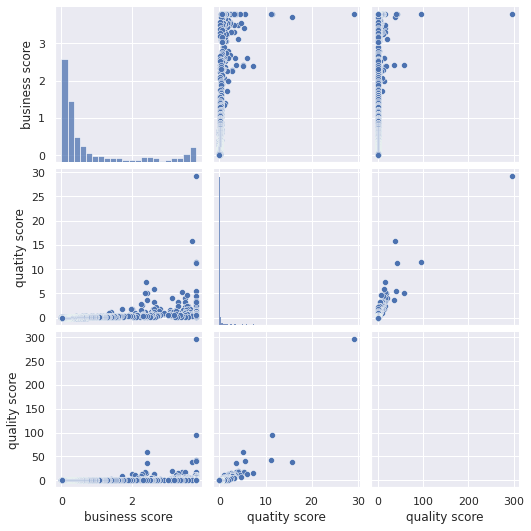

In [ ]:
# pairplot of the dataframe's business, quality and quantity scores
plt.figure(figsize=(25,25))
sns.pairplot(df, vars = ['business score', 'quatity score', 'quality score'])

This visualization is made to see correlation between business, quality, and quantity scores at once, to save time and room. From here we can choose variables to work with in the Hypothesis part.

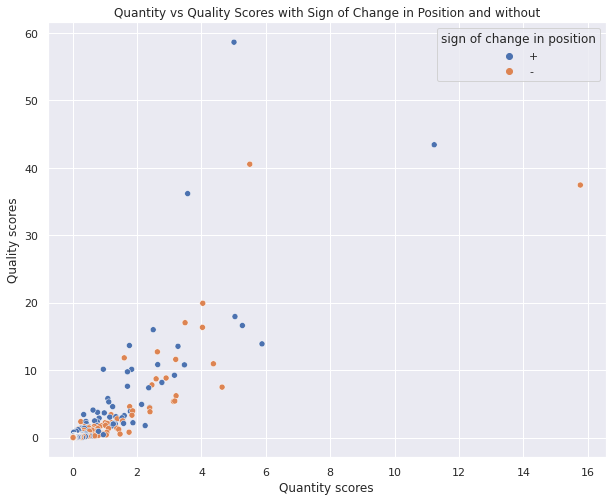

In [ ]:
#change the dimensions (inches)
plt.figure(figsize=(10,8))
# scatter plot of quantity score and quality score with the sign of change in position represented by color
sns.scatterplot(x='quatity score', y='quality score',hue='sign of change in position', data=df)
#add custom label and title
plt.xlabel('Quantity scores')
plt.ylabel('Quality scores')
plt.title("Quantity vs Quality Scores with Sign of Change in Position and without")
plt.show()

This scatterplot shows correlation between quantity and quality scores of the cities. Colors indicates if there is a sign of change in position or not. As we can see the data is correlated and it is positive correlation.

In [ ]:
# test for correlation
stats.pearsonr(df['quatity score'], df['quality score'])

(0.881723794732008, 0.0)

There is a statistically significant linear relationship between quantity score and quality score of the countries. The relationship is positive.

# Hypothesis 2 

Ho: There is no statistically significant difference in the average total score of the cities with the sign of change in position and without the sign of change in position.

Ha: There is a statistically significant difference in the average total score of the cities with the sign of change in position and without the sign of change in position.


In [ ]:
# split the data for a t-test
cities_with=df.loc[df['sign of change in position'] == '+']
cities_without=df.loc[df['sign of change in position'] == '-']

In [ ]:
#sanity check
cities_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 4 to 997
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   position                      414 non-null    int64  
 1   change in position from 2020  414 non-null    object 
 2   city                          414 non-null    object 
 3   country                       414 non-null    object 
 4   total score                   414 non-null    float64
 5   quatity score                 414 non-null    float64
 6   quality score                 414 non-null    float64
 7   business score                414 non-null    float64
 8   sign of change in position    414 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 32.3+ KB


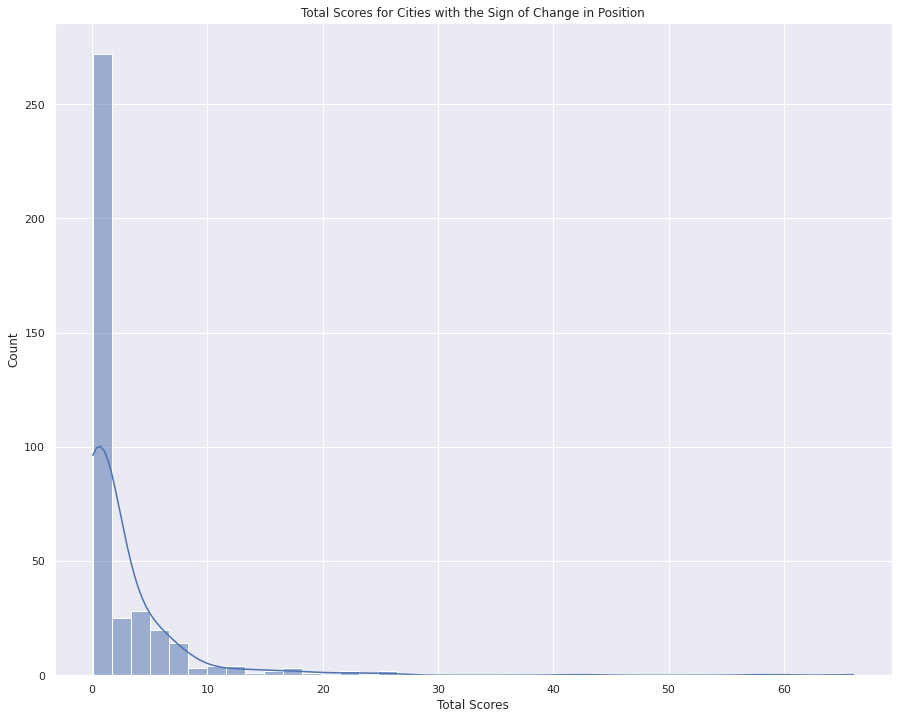

In [ ]:
# plot the distribution of total scores of cities with and without sign of change
plt.figure(figsize=(15,12))
sns.histplot(cities_with['total score'], bins= 40, kde= True)
plt.xlabel('Total Scores')
plt.ylabel('Count')
plt.title("Total Scores for Cities with the Sign of Change in Position")
plt.show()

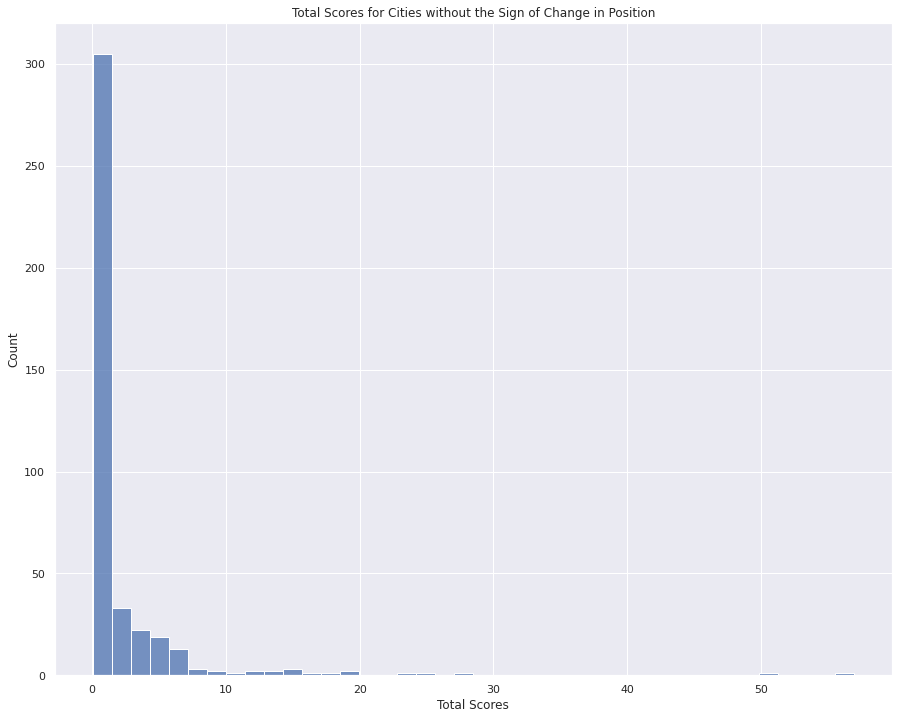

In [ ]:
plt.figure(figsize=(15,12))
sns.histplot(cities_without['total score'], bins =40)
plt.xlabel('Total Scores')
plt.ylabel('Count')
plt.title("Total Scores for Cities without the Sign of Change in Position")
plt.show()

The distributions don't appear to be normal but due to the CLT(Central Limit Theorem) and a sample size over 100 it is acceptabe to procede, as the t-test is robust to non-normality with sufficient sample size. 

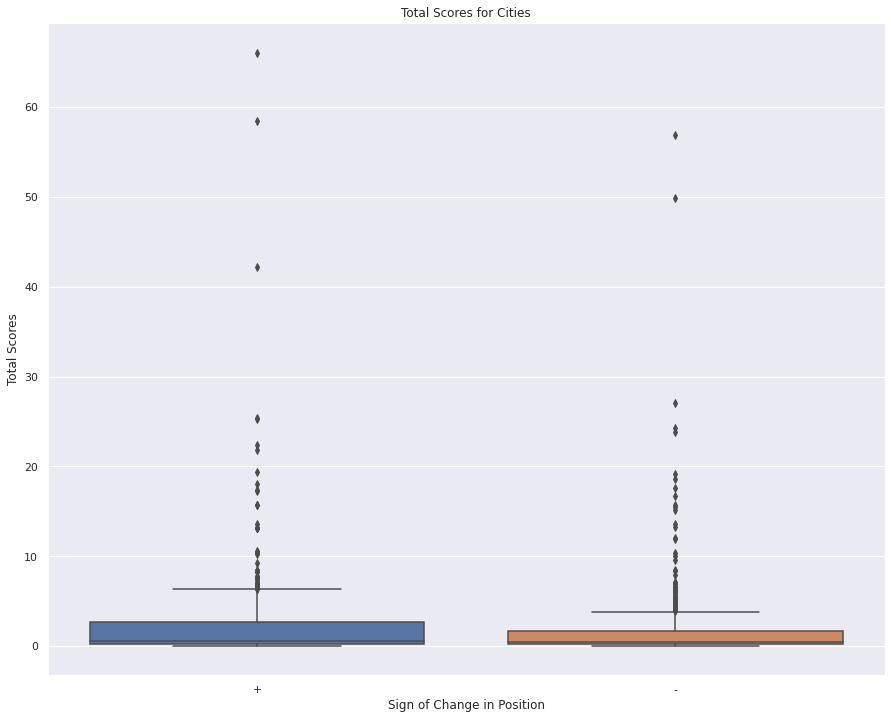

In [ ]:
# Make a boxplot to visualize the difference
plt.figure(figsize=(15,12))
sns.boxplot(y = df['total score'], x = df['sign of change in position'])
plt.ylabel('Total Scores')
plt.xlabel('Sign of Change in Position')
plt.title("Total Scores for Cities")
plt.show()

The boxplot visually shows us the distributions between the cities with the sign of change in position and without the sign of change in position. 
Upper line indicates Max value, while lower one indicates Min value. The dots over max value and below min value show outliers. 

In [ ]:
 # run two sample t-test
stats.ttest_ind(cities_with['total score'], cities_without['total score'])

Ttest_indResult(statistic=1.5285158431140429, pvalue=0.12678177388784045)

There is no statistically significant difference in the average total score of the cities with the sign of change in position and without the sign of change in position.

# Conclusion

There is a relationship between quality scores and quantity scores of the countries, which means when quality score goes up so does quantity score and vice versa.
Second hypothesis result shows that there is no difference between average total scores of cities with the sign of change in position and without the sign of change in position.

# Summary of recommendations

**Investors:**
look for quantity and quality scores of the cities when deciding to invest your money, since they indicate successfulness of the project you are investing in.

**Startupers**:
pick anywhere to start realizing your ideas regardless of the position of the countries. You can enter the market online which gives you wider audience and the location won't make any sense. 